# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [1]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

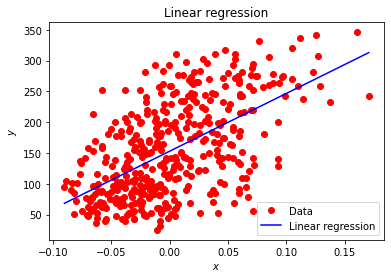

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [6]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

#### Initialization of dataset variables

In [7]:
from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.datasets import load_diabetes, load_breast_cancer

breast_cancer = datasets.load_breast_cancer()

# create train and test datasets for the breast cancer dataset
X_bc = breast_cancer.data
y_bc = breast_cancer.target

#X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X, y, stratify=y, random_state=40)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, stratify=y_bc, random_state=40)

# create train and test
# datasets for the diabetes dataset
X_diabetes = diabetes.data
y_diabetes = diabetes.target

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, random_state=40)


### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

#### Answer

The mean square error (MSE) of an estimator $\hat{\theta}$, where $\theta$ is an unknown parameter is defined as:

$$
\text{MSE}(\hat{\theta}) = \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \theta \right)^2 \right]
$$

The MSE measures the average squared difference between the estimator $\hat{\theta}$ and the parameter $\theta$, a somewhat reasonable measure of performance for an estimator. 

The MSE can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the MSE and variance are equivalent. 

The expression that describes this relationship can be deduced as follows:

$$
\text{MSE}(\hat{\theta}) = \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \theta \right)^2 \right]
$$

$$
= \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] + \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right)^2 \right]
$$

$$
= \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right)^2 + 2 \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right) \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right) + \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right)^2 \right]
$$

$$
= \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right)^2 \right] + \mathbb{E}_{\theta}\left[ 2 \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right) \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right) \right] + \mathbb{E}_{\theta}\left[ \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right)^2 \right]
$$

$$
= \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right)^2 \right] + 2 \mathbb{E}_{\theta}\left[ \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right] \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right) + \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right)^2
$$

$$
= \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \mathbb{E}_{\theta}[\hat{\theta}] \right)^2 \right] + \left( \mathbb{E}_{\theta}[\hat{\theta}] - \theta \right)^2
$$

$$
= \text{Var}_{\theta}(\hat{\theta}) + \text{Bias}_{\theta}(\hat{\theta}, \theta)^2
$$


An alternative deduction to obtain this expression is using the following formula:
$$ 
\text{E}(X^2)=\text{Var}(X)+(E(X))^2 
$$
By substituing $X$ with $ \hat{\theta}-\theta $, we get:
$$
\text{MSE}(\hat{\theta}) = \mathbb{E}_{\theta}\left[ \left( \hat{\theta} - \theta \right)^2 \right]
$$

$$
= \text{Var}(\hat{\theta}-\theta)+(\mathbb{E}[\hat{\theta}-\theta])^2
$$

$$
= \text{Var}(\hat{\theta})+\text{Bias}^2(\hat{\theta}-\theta)
$$

### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

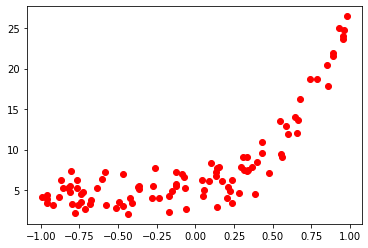

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

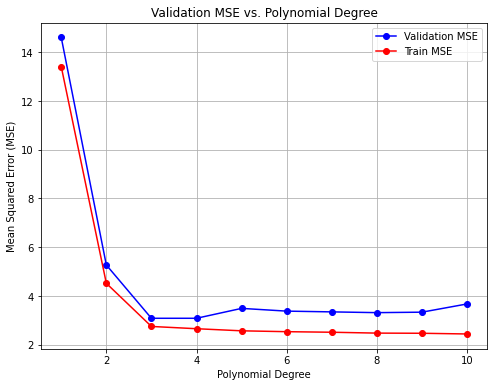

Best polynomial degree: 3
Validation MSE of best model: 3.0849098422951426
Test MSE: 1.204262077182823


In [9]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score

# Set up the pipeline with PolynomialFeatures and Linear Regression

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the input features
    ('poly', PolynomialFeatures()),  
    ('linear', LinearRegression())  
])

# Define the hyperparameters for grid search: the degree of the polynomial
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Testing polynomial degrees from 1 to 10
}

# Set up GridSearchCV 

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Split the custom data into training and test data. Need to reshape X to a 2D array however to use PolynomialFeatures.

X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Extract mean test scores (neg_mean_squared_error) and polynomial degrees
mean_test_scores = -cv_results['mean_test_score']  # Negate the negative MSE to get positive MSE
degrees = param_grid['poly__degree']

mean_train_scores = -cv_results['mean_train_score'] # Extract mean train scores and negate the negative MSE


# Plot the learning curve (validation MSE as a function of polynomial degree)
plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_test_scores, marker='o', color='b', label='Validation MSE')
plt.plot(degrees, mean_train_scores, marker='o', color='r', label='Train MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation MSE vs. Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()

# Print the best polynomial degree and validation MSE score
print(f"Best polynomial degree: {grid_search.best_params_['poly__degree']}")
print(f"Validation MSE of best model: {-grid_search.best_score_}")  # Negative MSE was used, so negate it

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

In [10]:
print(y_diabetes_train.shape)
print(y_diabetes_test.shape)
print(X_diabetes_train.shape)
print(X_diabetes_test.shape)

(331,)
(111,)
(331, 10)
(111, 10)


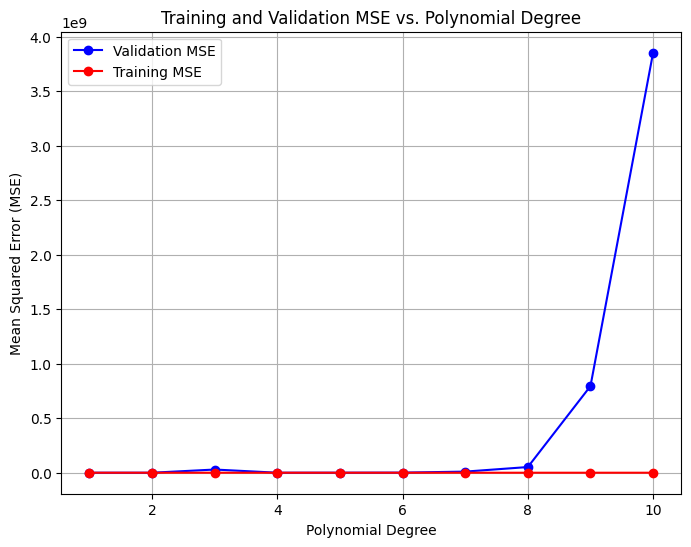

Best polynomial degree: 1
Validation MSE of best model: 2729.885739989991
Test MSE: 4005.2432354503294


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import datasets

# Set up the pipeline with PolynomialFeatures and LinearRegression with standard scaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the input features
    ('poly', PolynomialFeatures()),  
    ('linear', LinearRegression())  
])

# Define the hyperparameters for grid search: the degree of the polynomial
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Testing polynomial degrees from 1 to 10
}

# Set up the GridSearchCV object with neg_mean_squared_error for regression scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) # Add this to return train scores

# Fit the model using grid search
grid_search.fit(X_diabetes_train, y_diabetes_train)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Extract mean test scores (mean negative MSE) and polynomial degrees
mean_test_scores = -cv_results['mean_test_score']  # Negating the neg_mean_squared_error to get positive MSE
degrees = param_grid['poly__degree']

# Plot both training and validation error (MSE)

mean_train_scores = -cv_results['mean_train_score'] # Extract mean train scores and negate the negative MSE

# Plot both training and validation MSE
plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_test_scores, marker='o', color='b', label='Validation MSE')
plt.plot(degrees, mean_train_scores, marker='o', color='r', label='Training MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE vs. Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()


# Print the best polynomial degree and test score
print(f"Best polynomial degree: {grid_search.best_params_['poly__degree']}")
print(f"Validation MSE of best model: {-grid_search.best_score_}")  # Negative MSE was used, so negate it

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_diabetes_pred = best_model.predict(X_diabetes_test)
test_mse = mean_squared_error(y_diabetes_test, y_diabetes_pred)
print(f"Test MSE: {test_mse}")

#### Results & Discussion

In both exercises, the models are generated through a pipeline containing `PolynomialFeatures` and `LinearRegression` with standard scaler. In order to find the best parameters for the model, models with varying polynomial degrees [1-10] were tested with `GridSearchCV`, with 5-fold cross validation. The models were fit to the training set, and Mean Squared Error (MSE) score was calculated on both training and validation sets. These scores were then plotted in order to understand whether the model could be under/overfitting on the dataset.

The first plot shows the performance of the polynomial model on a randomly generated dataset with 100 data points, with the x-axis denoting the polynomial degree of the model, and y-axis showing the recorded MSE score. It can be seen that the model is performing poorly when the polynomial degree is very low, as evident from the high MSE scores during training and validation. The model achieves the lowest validation MSE score with 3 polynomial degrees, and while the MSE score during training continues decreasing, the scores recorded in validation sets increase consistently -indicating overfitting of the model. In terms of bias and variance, the model shows high variance with higher degrees of polynomials, as it cannot generalise well to the validation data. Additionally, the models with lower polynomial degrees cannot capture the complexity of the data distribution well enough, leading to underfitting of the model, and high bias.

The second plot shows the performance of the polynomial model on the diabetes dataset. Compared to the model in the first exercise, the validation and training scores do not show a sign of underfitting at lower polynomial degrees. In fact, the best MSE is reached when the polynomial model has a degree of 1. However at the higher end of the polynomial degrees, the model seems to overfit to the training data, the validation loss steeply increasing as the model complexity increases. The models with higher polynomial orders exhibit low bias and high variance, as the model cannot seem to generalize well to the unseen test data and records high MSE error, while performing well on the train data.

In conclusion, it can be said that on both datasets, the models with lower polynomial degrees perform best on the test set. When the chosen polynomial degree is too low, the model underfits the training data, and shows high bias. On the other hand, models with higher polynomial degrees overfit to the dataset, and lead to high variance. 

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

#### Introduction/ Explanation of code

For k-NN, the predicted class can be treated as a probability by calculating the proportion of neighbors belonging to each class. By varying the threshold for classifying a sample as positive, different confusion matrices can be generated, resulting in varying True Positive Rate (TPR) and False Positive Rate (FPR) values, which can then be used to generate a ROC curve.

The ROC curve plots the TPR against the FPR as the threshold changes. TPR, also known as sensitivity, can be calculated as: 
$$\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

In our dataset, the true positives are the samples correctly classified as malignant, while the false negatives are the malignant samples incorrectly classified as benign. Thus, TPR indicates the proportion of malignant samples correctly classified.
FPR can also be viewed as $1 - Specificity$ and is calculated as:
$$\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$$

In our dataset, false positives are benign samples incorrectly classified as malignant, and true negatives are benign samples correctly classified. Hence, FPR shows the proportion of benign samples that are incorrectly classified.

Depending on the clinical context, we might prefer different trade-offs. For example, we might choose a threshold that maximizes sensitivity (even if it increases FPR) to ensure that no malignant cases are missed. Conversely, in other scenarios, balancing sensitivity with specificity (i.e., $1- \text{FPR}$) might be preferred to reduce false positives.

The pipeline, incorporating scaling and the $k$-NN model as described in the preliminaries, was utilized as the estimator for `GridSearchCV` to develop the model. A 10-fold cross-validation was conducted with a fixed random state to ensure reproducibility. Although manually iterating through different values of $k$
without using `GridSearchCV` is feasible, this approach was selected to produce a more robust and adaptable code that can be applied to other analyses.

An ROC curve was generated for each value of $k$, with the corresponding False Positive Rate (FPR), True Positive Rate (TPR), and thresholds reported.

Additionally, to evaluate the overall performance of the classifiers, we can calculate the area under the ROC curve (AUC). An AUC of 1.0 indicates a perfect classifier, while an AUC of 0.5 suggests that the classifier performs no better than random chance and has no ability to distinguish between positive and negative classes. In GridSearchCV, the scoring was set to 'roc_auc' for this analysis.

In [13]:
import sys
sys.path.append('code/')

from knn_roc import *
model_grid, cv_results = create_and_train_knn_pipeline(X_bc_train, y_bc_train, param_grid={'knn__n_neighbors':[i for i in range(1,20,2)]}, n_cv=10, random_state=40)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001565      0.004694         0.014926        0.003991   
1       0.001855      0.003843         0.014452        0.006421   
2       0.002666      0.004826         0.016578        0.004699   
3       0.001159      0.003478         0.017849        0.003083   
4       0.001114      0.002040         0.018070        0.002900   
5       0.001750      0.003580         0.014306        0.003923   
6       0.001063      0.003189         0.013214        0.005442   
7       0.002768      0.005420         0.012123        0.004919   
8       0.001955      0.001812         0.016459        0.003183   
9       0.001270      0.003809         0.015998        0.003123   

  param_knn__n_neighbors                    params  split0_test_score  \
0                      1   {'knn__n_neighbors': 1}           0.931713   
1                      3   {'knn__n_neighbors': 3}           0.944444   
2                      5   {'knn__n_neighbo

n_neighbors=1
   False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                   0.000000                  0.000000         inf
1                   0.037736                  0.966667         1.0
2                   1.000000                  1.000000         0.0
------------------------------------------------------------
n_neighbors=3
   False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                   0.000000                  0.000000         inf
1                   0.000000                  0.877778    1.000000
2                   0.037736                  1.000000    0.666667
3                   0.132075                  1.000000    0.333333
4                   1.000000                  1.000000    0.000000
------------------------------------------------------------
n_neighbors=5
   False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                   0.000000                  0.000000         inf
1                   0.000000    

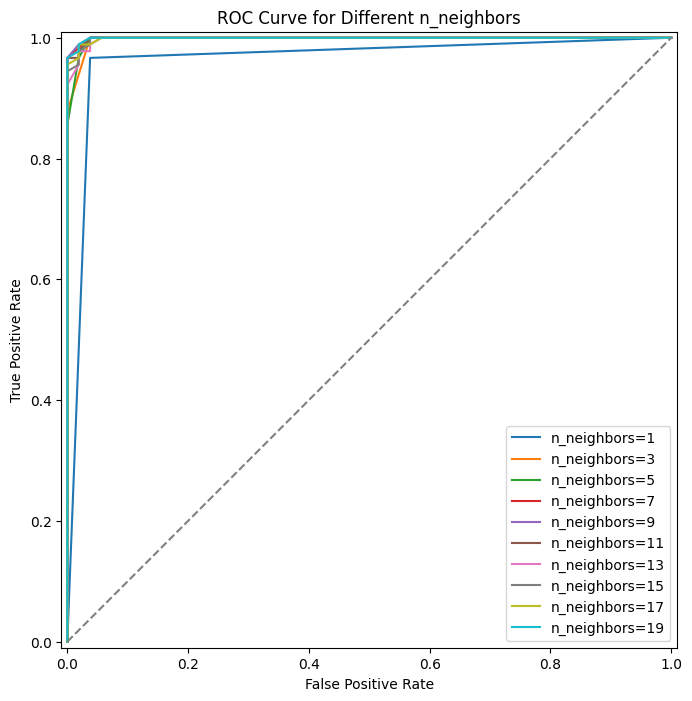

In [14]:
# Call the function to plot ROC curves and visualize thresholds
plot_roc(model_grid, X_bc_train, y_bc_train, X_bc_test, y_bc_test)

#### Results & Discussion

The classifier achieved consistently high AUC values across all evaluated n_neighbors, with values reaching 1.00 for increasingly number of neighbors, suggesting an improvement of the model's discriminatory power. From the mean test scores, the classifier with n_neighbors = 15 achieved the highest score (0.990), while n_neighbors = 1 showed the lowest (0.939).

For the same FPR, the model with n_neighbors = 1 shows a lower TPR compared to the other models, resulting in a reduced AUC, as previously observed. Increasing the number of neighbors stabilizes the performance, keeping the FPR low and flattening the ROC curves, indicating a balanced trade-off between high TPR and low FPR. Larger values of k generally improve the model's overall robustness by reducing overfitting. However, the benefits taper off after a certain point (around n_neighbors = 9), where the curves appear similar.

In conclusion, values of n_neighbors ≥ 3 lead to robust and generalizable performance, with n_neighbors = 5 or higher providing an optimal balance.

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


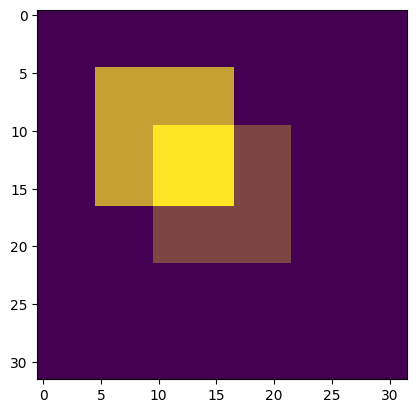

In [15]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

#### Introduction

To show that the F1 score is equivalent to the Dice similarity coefficient, we first understand how both metrics are defined.

#### 1. **F1 Score**:

The F1 score is the harmonic mean of precision and recall. In binary classification (such as image segmentation), it is defined as:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Where:
- **Precision** is the proportion of correctly identified positive examples (true positives) out of all the positive predictions (true positives + false positives).

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** is the proportion of correctly identified positive examples (true positives) out of all the actual positives (true positives + false negatives).

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

#### 2. **Dice Similarity Coefficient**:

The Dice similarity coefficient (DSC) is calculated as:

$$
DSC = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Where:
- $|A|$ is the cardinality (number of non-zero pixels) of the ground truth segmentation $A$.
- $|B|$ is the cardinality (number of non-zero pixels) of the segmentation method output $B$.
- $|A \cap B|$ is the number of overlapping positive pixels between $A$ and $B$, which represents true positives.


#### 3. **Establishing the Equivalence**:

In the context of image segmentation:
- **True Positives (TP)**: The number of pixels correctly predicted as belonging to the object (i.e., overlapping non-zero pixels in \(A\) and \(B\)).
- **False Positives (FP)**: The number of pixels predicted as belonging to the object by \(B\), but not present in \(A\).
- **False Negatives (FN)**: The number of pixels present in \(A\), but not predicted by \(B\).

We now rewrite the F1 score using this terminology:

$$
F1 = 2 \cdot \frac{\text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}}
$$

The Dice coefficient can also be written in a similar manner by recognizing that the intersection  $|A \cap B|$ is equivalent to the true positives:

$$
DSC = \frac{2 \cdot \text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}}
$$

Thus, we can see that:

$$
F1 = DSC
$$

Both the F1 score and the Dice similarity coefficient are mathematically equivalent, as they measure the same thing: the harmonic mean of precision and recall in the context of binary classification, or the overlap between the predicted and true segmentation in the case of image segmentation.


#### Example Analysis

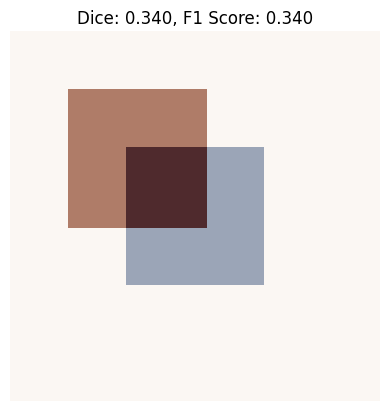

(0.3402777777777778, 0.3402777777777778)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# generate some test objects
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

# Dice similarity coefficient
dice = 2 * np.sum(A * B) / (np.sum(A) + np.sum(B))

# Precision and recall calculation
precision = np.sum(A * B) / np.sum(B)
recall = np.sum(A * B) / np.sum(A)

# F1 score calculation
f1_score = 2 * (precision * recall) / (precision + recall)

# display the results
plt.imshow(A, cmap='Blues')
plt.imshow(B, cmap='Oranges', alpha=0.6)
plt.title(f"Dice: {dice:.3f}, F1 Score: {f1_score:.3f}")
plt.axis('off')
plt.show()

dice, f1_score


#### Explanation of Code

We create two binary images, A and B, which simulate segmented regions of an image. The Dice coefficient measures how similar the two images are by comparing the overlap between them relative to their sizes. The F1 score combines precision and recall into one metric. Precision checks how many of the predicted positive pixels in B are correct, while recall checks how many of the ground truth pixels in A were captured by the prediction. 

The Dice similarity coefficient and the F1 score are both computed as approximately 0.340, demonstrating that the F1 score is indeed equivalent to the Dice similarity coefficient, as shown by their identical values.